# Text preprocessing

In [105]:
import pandas as pd
import re
import os
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


In [110]:
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /home/gmas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/gmas/nltk_data...


True

## Creating a DataFrame with filenames, texts and case names

In [34]:
filenames = os.listdir("text_files")
filenames = [x for x in filenames if "ipynb" not in x]

In [12]:
texts = []
for i in os.listdir("text_files"):
    if "ipynb" not in i:
        f = open(f"text_files/{i}", "r")
        text = f.read()
        f.close()
        texts.append(text)

In [26]:
matches = []
for text in texts:
    try:
        m = re.search(r"\n.+v\..+\n", text)
        matches.append(m.group())
    except:
        matches.append("no data found")

In [28]:
matches = [x.strip("\n") for x in matches]
matches

['AUSTRIANU v. ROMANIA',
 'D.G. v. POLAND',
 'LÁSZLÓ KÁROLY v. HUNGARY (No. 2)',
 'ZUYEV v. RUSSIA',
 'VASILIY VASILYEV v. RUSSIA',
 'YEFIMOVA v. RUSSIA',
 'KOWRYGO v. POLAND',
 'GEANOPOL v. ROMANIA',
 'INSANOV v. AZERBAIJAN',
 'ZARZYCKI v. POLAND',
 'VALIULIENĖ v. LITHUANIA',
 'KOROBOV AND OTHERS v. ESTONIA',
 'NOVAYA GAZETA AND BORODYANSKIY v. RUSSIA',
 'EON v. FRANCE [Extracts]',
 'BLEJUŞCĂ v. ROMANIA',
 'IVAKHNENKO v. RUSSIA',
 'REZNIK v. RUSSIA',
 'MARKARYAN v. RUSSIA',
 'IURCU v. THE REPUBLIC OF MOLDOVA',
 'OCHELKOV v. RUSSIA',
 'CĂŞUNEANU v. ROMANIA',
 'AGEYEVY v. RUSSIA',
 'HAGYÓ v. HUNGARY',
 'ERKAPIĆ v. CROATIA',
 'ZAGIDULINA v. RUSSIA',
 'SAMARTSEV v. RUSSIA',
 'PETUKHOVA v. RUSSIA',
 'TYMOSHENKO v. UKRAINE',
 'GAVULA v. UKRAINE',
 'BARILO v. UKRAINE',
 'KOMAROVA v. UKRAINE',
 'GROSS v. SWITZERLAND',
 'N.K.M. v. HUNGARY',
 'E.A. v. RUSSIA',
 'SABEV v. BULGARIA',
 'EREMIA v. THE REPUBLIC OF MOLDOVA',
 "OOO 'VESTI'  AND UKHOV v. RUSSIA",
 'DAVITIDZE v. RUSSIA',
 'MASKHADOVA AN

In [33]:
len(filenames)

1236

In [29]:
len(matches)

1235

In [35]:
df = pd.DataFrame({"casefile":filenames, "texts":texts, "names":matches})
df

,casefile,texts,names
0,001-116367.txt,\n\n\nAUSTRIANU v. ROMANIA\n\n\n\n\n\n\n\n\n\n...,AUSTRIANU v. ROMANIA
1,001-116410.txt,\n\n\nD.G. v. POLAND\n\n\n\n\n\n\n\n\n\n\n\n\n...,D.G. v. POLAND
2,001-116412.txt,\n\n\nLÁSZLÓ KÁROLY v. HUNGARY (No. 2)\n\n\n\n...,LÁSZLÓ KÁROLY v. HUNGARY (No. 2)
3,001-116592.txt,\n\n\nZUYEV v. RUSSIA\n\n\n\n\n\n\n\n\n\n\n\n\...,ZUYEV v. RUSSIA
4,001-116593.txt,\n\n\nVASILIY VASILYEV v. RUSSIA\n\n\n\n\n\n\n...,VASILIY VASILYEV v. RUSSIA
...,...,...,...
1230,001-222750.txt,\n\n\nFEDOTOVA AND OTHERS v. RUSSIA\n\n\n\n\n\...,FEDOTOVA AND OTHERS v. RUSSIA
1231,001-222783.txt,\n\n\nKREYNDLIN AND OTHERS v. RUSSIA\n\n\n\n\n...,KREYNDLIN AND OTHERS v. RUSSIA
1232,001-222787.txt,\n\n\nALIYEV v. AZERBAIJAN\n\n\n\n\n\n\n\n\n\n...,ALIYEV v. AZERBAIJAN
1233,001-222872.txt,\n\n\nB v. RUSSIA\n\n\n\n\n\n\n\n\n\n\n\n\n\n\...,B v. RUSSIA


## Cleaning text

In [60]:
def clean_text(astring):
    clean = astring.replace('\xa0', ' ').replace('•', '').replace('§', '').replace('”', '')
    # added remove double spaces
    clean = re.sub(' +', ' ', clean)
    clean = re.sub(r'[^\w\s]', '', clean)
    clean = re.sub(r'\d+', '', clean)
    # makes sure there is a space between uppercase and lowercase text
    clean = re.sub(r'(?<=[a-z0-9])(?=[A-Z])', ' ', clean)
    return clean

In [ ]:
df['clean'] = df.texts.apply(clean_text)

## Get the facts section

In [ ]:
df['facts']= df.clean.apply(fact_extraction)

In [88]:
def fact_extraction(astring):
    try:
        result = re.search(r"(?<=FACTS).+(?=THE\sLAW)", astring).group()
        return result
    except:
        return "no data found"

In [90]:
df['len_facts'] = df.facts.apply(lambda x: len(x))

In [ ]:
df.clean[2]

<Axes: xlabel='len_facts', ylabel='Count'>

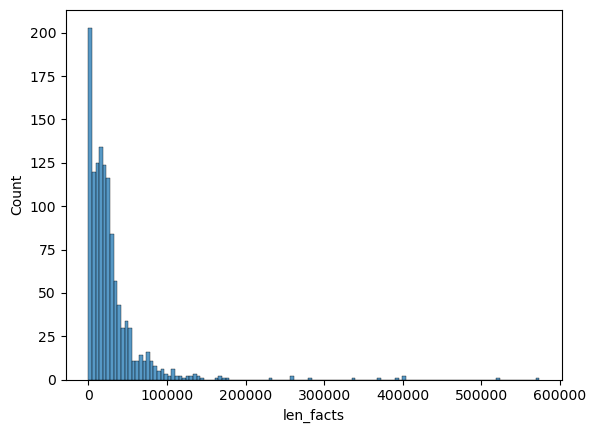

In [92]:
sns.histplot(df.len_facts)

## Tokenization

In [102]:
legal_sw = ['adjourned', 'affidavit', 'allegation', 'appeal', 'appellant', 'application', 'applicant', "applicant's",
            'arbitration','case', 'cause', 'claim', 'clerk', 'complaint', 'consent', 'contempt', 'contravention',
            'conviction','costs', 'court', 'cross-examination', 'defence', 'defendant', 'deposition', 'discovery',
            'dispute','evidence', 'examination', 'fact', 'hearing', 'judge', 'judgment', 'jurisdiction', 'justice','law',
            'lawsuit', 'legal', 'litigant', 'litigation', 'moot', 'motion', 'objection', 'order', 'parties', 'pleading',
            'proceedings', 'ruling', 'sentence', 'settlement', 'solicitor', 'statute', 'subpoena', 'testimony', 'trial',
            'verdict', 'witness', 'cases', 'courts', "litigant's", "defendant's","judge's", 'council', 'government',
            'mr', 'lawyer', 'supreme', 'judicial', 'ha', 'wa', 'european','union','person','right','freedom','expression',
            'see','paragraph','read','follows','article','human','section','criminal','police','abdullah','öcalan','turkish',
            'turkey','istanbul','public','prosecutor','russian federation','public','event','administrative','offence',
            'moscow','proceeding','decision']

month_sw = ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november'
            , 'december']


In [111]:
def get_tokens(astring):
    lemmatizer = WordNetLemmatizer()
    all_stopwords = set(stopwords.words('english') + legal_sw + month_sw)
    tokens = word_tokenize(astring.lower())
    filtered_tokens = [token for token in tokens if token not in all_stopwords and len(token) > 2]
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
    return lemmatized_tokens
    

In [112]:
df['tokens'] = df.clean.apply(get_tokens)

In [114]:
df['len_tokens'] = df.tokens.apply(lambda x: len(x))

<Axes: xlabel='len_tokens', ylabel='Count'>

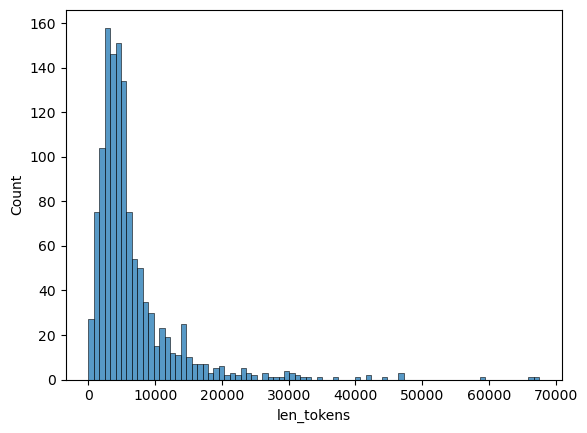

In [115]:
sns.histplot(df.len_tokens)

## Subsetting out cases

In [124]:
df = df[~(df.names=="no data found")]

In [131]:
df[df.len_facts>13].sort_values('len_facts').head(40)

,casefile,texts,names,clean,facts,len_facts,tokens,len_tokens
940,001-204268.txt,\n\n\nZABOLOTNYY AND OTHERS v. UKRAINE\n\n\n\n...,ZABOLOTNYY AND OTHERS v. UKRAINE,\n\n\nZABOLOTNYY AND OTHERS v UKRAINE\n\n\n\n\...,The applicants details and the relevant facts...,144,"[zabolotnyy, others, ukraine, terminator, term...",3154
1214,001-221519.txt,\n\n\nRASCHUPKIN v. RUSSIA\n\n\n\n\n\n\n\n\n\n...,RASCHUPKIN v. RUSSIA,\n\n\nRASCHUPKIN v RUSSIA\n\n\n\n\n\n\n\n\n\n\...,The applicants details and information releva...,226,"[raschupkin, russia, terminator, terminator, r...",1121
1195,001-220533.txt,\n\n\nMIKHAYLOV AND OTHERS v. RUSSIA\n\n\n\n\n...,MIKHAYLOV AND OTHERS v. RUSSIA,\n\n\nMIKHAYLOV AND OTHERS v RUSSIA\n\n\n\n\n\...,The list of applicants and the relevant detai...,230,"[mikhaylov, others, russia, terminator, termin...",1258
1197,001-220545.txt,\n\n\nYEFIMOV AND OTHERS v. RUSSIA\n\n\n\n\n\n...,YEFIMOV AND OTHERS v. RUSSIA,\n\n\nYEFIMOV AND OTHERS v RUSSIA\n\n\n\n\n\n\...,The list of applicants and the relevant detai...,231,"[yefimov, others, russia, terminator, terminat...",1184
1154,001-218548.txt,\n\n\nGOLIKOV AND OTHERS v. RUSSIA\n\n\n\n\n\n...,GOLIKOV AND OTHERS v. RUSSIA,\n\n\nGOLIKOV AND OTHERS v RUSSIA\n\n\n\n\n\n\...,The list of applicants and the relevant detai...,231,"[golikov, others, russia, terminator, terminat...",1175
1187,001-219727.txt,\n\n\nCHERKASOV AND BYKOV v. RUSSIA\n\n\n\n\n\...,CHERKASOV AND BYKOV v. RUSSIA,\n\n\nCHERKASOV AND BYKOV v RUSSIA\n\n\n\n\n\n...,The list of applicants and the relevant detai...,231,"[cherkasov, bykov, russia, terminator, termina...",1271
713,001-184669.txt,\n\n\nSHULMIN AND OTHERS v. RUSSIA\n\n\n\n\n\n...,SHULMIN AND OTHERS v. RUSSIA,\n\n\nSHULMIN AND OTHERS v RUSSIA\n\n\n\n\n\n\...,The list of applicants and the relevant detai...,231,"[shulmin, others, russia, terminator, terminat...",1229
1196,001-220535.txt,\n\n\nLABUDYAK AND OTHERS v. UKRAINE\n\n\n\n\n...,LABUDYAK AND OTHERS v. UKRAINE,\n\n\nLABUDYAK AND OTHERS v UKRAINE\n\n\n\n\n\...,The list of applicants and the relevant detai...,256,"[labudyak, others, ukraine, terminator, termin...",1578
1177,001-219657.txt,\n\n\nARKHIPOV AND OTHERS v. RUSSIA\n\n\n\n\n\...,ARKHIPOV AND OTHERS v. RUSSIA,\n\n\nARKHIPOV AND OTHERS v RUSSIA\n\n\n\n\n\n...,The list of the applicants and the relevant d...,266,"[arkhipov, others, russia, terminator, termina...",2461
1217,001-221643.txt,\n\n\nFINOGENOV v. RUSSIA\n\n\n\n\n\n\n\n\n\n\...,FINOGENOV v. RUSSIA,\n\n\nFINOGENOV v RUSSIA\n\n\n\n\n\n\n\n\n\n\n...,The applicants details and information releva...,273,"[finogenov, russia, terminator, terminator, re...",1295


In [125]:
df.to_csv("all_data.csv", index=None)